In [1]:
from fastai.vision.all import *
import fastai
import timm
import albumentations as A
import torch
torch.cuda.set_device(1)

In [97]:
import os
def create_csvValid(path):
    output_path = os.path.join(path,"..","df_regression_train.csv")
    if (os.path.exists(output_path)):
        output_path_csv = open(output_path, "a")
    else:
        output_path_csv = open(output_path, "w")
        head = "images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12\n"
        output_path_csv.write(head)

    
    lista_archivos = list(os.walk(path))
    lista_archivos.sort()
    for carpeta in lista_archivos:
#         print(carpeta[0])
        video = carpeta[0].split(os.path.sep)[-1]
        for files in carpeta[2]:
            if "images_labelSmoothing.csv" in files:
                leer = open(os.path.join(carpeta[0],files))
                leer.readline()
                for l in leer:
                    escribir = ""
                    l = l.split(",")
                    for clas in l[1:]:
                        escribir= escribir + str(float(clas))+","

                    escribir = escribir[:-1]
#                     if len(escribir)==0:
#                         escribir = escribir+ "0"
                    escribir = escribir + "\n"
                    output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+","+escribir)
#                     print(l)

In [95]:
# import os
# def create_csvValid(path):
#     output_path = os.path.join(path,"..","df_regression_test.csv")
#     if (os.path.exists(output_path)):
#         output_path_csv = open(output_path, "a")
#     else:
#         output_path_csv = open(output_path, "w")
#         head = "images, class\n"
#         output_path_csv.write(head)

    
#     lista_archivos = list(os.walk(path))
#     lista_archivos.sort()
#     for carpeta in lista_archivos:
#         video = carpeta[0].split(os.path.sep)[-1]
#         for files in carpeta[2]:
#             if "images_labelSmoothing.csv" in files:
#                 leer = open(os.path.join(carpeta[0],files))
#                 leer.readline()
#                 for l in leer:
#                     escribir = ""
#                     l = l.split(",")
#                     for clas in l[1:]:
#                         if float(clas)>0:
#                             escribir= escribir +str(l.index(clas)-1) +" "
#                     escribir = escribir[:-1]
#                     if len(escribir)==0:
#                         escribir = escribir+ "0"
#                     regression = [0 for i in range(0, 13)]
#                     for c in escribir.split(" "):
#                         regression[int(c)] = 1
# #                     output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+","+escribir)
#                     output_path_csv.write(video+os.path.sep+"images"+os.path.sep+l[0]+";"+str(regression)+ "\n")
                

In [98]:
create_csvValid("./dataset_split_77frames/train")

In [2]:
import pandas as pd
import numpy as np

dfValid = pd.read_csv('./dataset_split_77frames/df_regression_train.csv')
dfTest = pd.read_csv('./dataset_split_77frames/df_regression_test.csv')

# prueba = dfValid

# prueba = prueba.iloc[np.random.permutation(len(prueba))]
# prueba = prueba[0:int(len(prueba)*0.1)]
# # In[6]:
# # Aquí debería hacer dos df diferentes. Uno para entrenamiento y otro para validación. En este caso 
# # usa para entrenar el set de entrenamiento y validación. Imagino que la división la hará por programa
# # dfValid = dfValid[(dfValid.set == 'training') | (dfValid.set == 'validation')]


# # Hay que modificar esto para que haya set de validación. Hacer un vector random y que esté entre las primeras 
# # 0.1 posiciones si está se devuelve 
# def is_valid(path):
#     name = path[0]
# #     return (dfValid[dfValid['challenge_id']==name])['set'].values[0]=='validation'
#     return (dfValid[dfValid['images']==name]).values[0] in prueba.images.values
    
# def get_class(path):
#     name = path[0]
#     return (dfValid[dfValid['images']==name])['class']


In [3]:
dfValid["lista"] = dfValid[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']].values.tolist()
dfValid.head()

,images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12,lista
0,IDU001V001/images/IDU001V001_from_0_to_77,0.38961,0.610390,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.3896103896103896, 0.6103896103896104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,IDU001V001/images/IDU001V001_from_57_to_134,0.00000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,IDU001V001/images/IDU001V001_from_114_to_191,0.00000,0.545455,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.5454545454545454, 0.4545454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,IDU001V001/images/IDU001V001_from_171_to_248,0.00000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,IDU001V001/images/IDU001V001_from_228_to_305,0.00000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [4]:
dfTest["lista"] = dfTest[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']].values.tolist()

dfTest.head()["lista"].values

array([list([0.4675324675324675, 0.5324675324675324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.8701298701298701, 0.12987012987012986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.12987012987012986, 0.8701298701298701, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
      dtype=object)

In [5]:
dfValid.dtypes

images       object
class 0     float64
class 1     float64
class 2     float64
class 3     float64
class 4     float64
class 5     float64
class 6     float64
class 7     float64
class 8     float64
class 9     float64
class 10    float64
class 11    float64
class 12    float64
lista        object
dtype: object

In [3]:
# import ast

# dfValid.head().values
# lista = []
# for l in dfValid.values:
#     lista.append(ast.literal_eval(l[1]))
# dfValid["class"] = lista

In [6]:
class TitledList(list, ShowTitle):
    _show_args = {'label': 'text'}
    def show(self, ctx=None, **kwargs):
        "Show self"
        return show_title(self, ctx=ctx, **merge(self._show_args, kwargs))

In [7]:
class ToListTensor(DisplayedTransform):
    "Transform to int tensor"
    # order = 10 #Need to run after PIL transforms on the GPU
    _show_args = {'label': 'text'}
    def __init__(self, split_idx=None,):
        super().__init__(split_idx=split_idx)

    def encodes(self, o): return o
    def decodes(self, o): return TitledList(o)

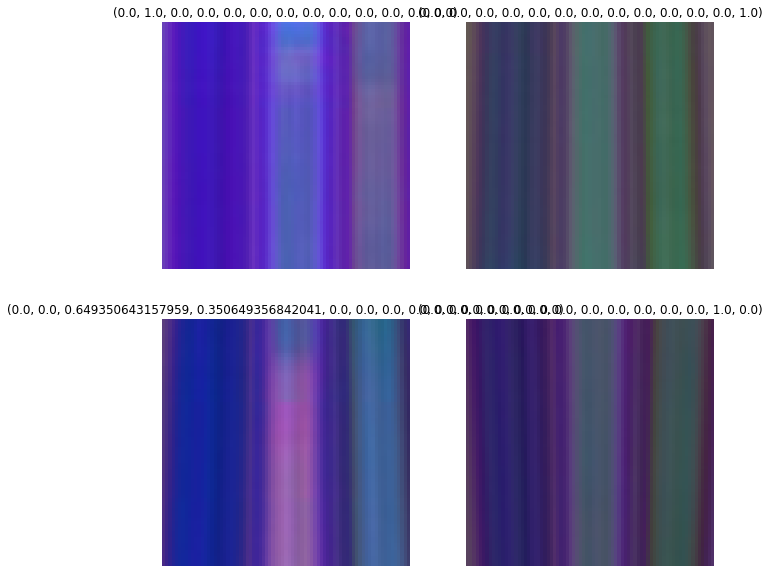

In [28]:
blocks = [ImageBlock, RegressionBlock]

item_tfms = [Resize(100)];# size should be bigger
batch_tfms = [*aug_transforms(size=77, min_scale=0.75,do_flip=False,flip_vert=False,
                  max_rotate=0.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)]
splitter = RandomSplitter()
monitoring = DataBlock(blocks =blocks,
                  get_x = ColReader("images", pref="./dataset_split_77frames/train/",suff='.jpg'),
                  get_y = Pipeline([ColReader("lista"),ToListTensor]),
                  splitter =splitter,
                  item_tfms=item_tfms,
                  batch_tfms = batch_tfms,
                  n_inp = 1
                  )
dls = monitoring.dataloaders(dfValid)
dls.show_batch(nrows=2,ncols=2,figsize=(10,10))

In [14]:
monitoring.summary(dfValid)

Setting-up type transforms pipelines
0                          IDU001V001/images/IDU001V001_from_0_to_77   
1                        IDU001V001/images/IDU001V001_from_57_to_134   
2                       IDU001V001/images/IDU001V001_from_114_to_191   
3                       IDU001V001/images/IDU001V001_from_171_to_248   
4                       IDU001V001/images/IDU001V001_from_228_to_305   
...                                                              ...   
8924  IDU041V006_20220213_203219/images/IDU041V006_from_1368_to_1445   
8925  IDU041V006_20220213_203219/images/IDU041V006_from_1425_to_1502   
8926  IDU041V006_20220213_203219/images/IDU041V006_from_1482_to_1559   
8927  IDU041V006_20220213_203219/images/IDU041V006_from_1539_to_1616   
8928  IDU041V006_20220213_203219/images/IDU041V006_from_1596_to_1673   

       class 0   class 1   class 2  class 3  class 4  class 5  class 6  \
0     0.389610  0.610390  0.000000      0.0      0.0      0.0      0.0   
1     0.000000  1.0000

SuggestedLRs(valley=0.0014454397605732083)

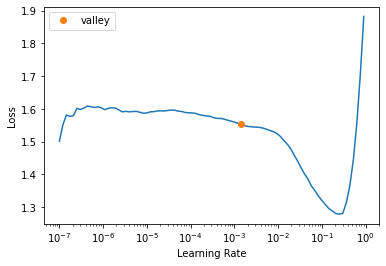

In [34]:
model = resnet50
learn = cnn_learner(dls, model, metrics=[MSELossFlat()], loss_func=L1LossFlat())
learn.lr_find()

In [35]:
learn.fine_tune(10,base_lr=3e-3)

epoch,train_loss,valid_loss,None,time
0,0.934972,0.357897,0.706562,00:09


epoch,train_loss,valid_loss,None,time
0,0.245389,0.260272,3.923385,00:11
1,0.173303,1.481438,196.837570,00:11
2,0.147294,0.315194,6.597414,00:10
3,0.133995,0.846030,84.303230,00:10


KeyboardInterrupt: 

In [13]:
learn.save("resnetrsRandAugLS_77frames_regression")

Path('models/resnetrsRandAugLS_77frames_regression.pth')

In [17]:
# dl = learn.dls.test_dl(dfTest)
# probs,_ = learn.get_preds(dl=dl)

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/load.py", line 118, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/basics.py", line 217, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/load.py", line 133, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/load.py", line 140, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/core.py", line 332, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/core.py", line 332, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/core.py", line 298, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/data/core.py", line 260, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastcore/dispatch.py", line 118, in __call__
    return f(*args, **kwargs)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/PIL/Image.py", line 2891, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: './dataset_split_77frames/train/IDU002V001/images/IDU002V001_from_0_to_77.jpg'


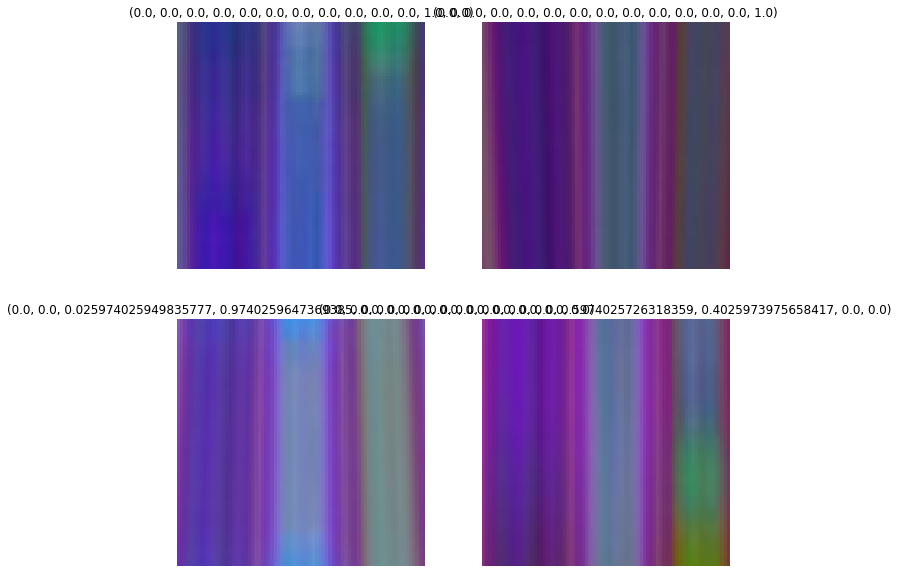

In [14]:
blocks = [ImageBlock, RegressionBlock]

item_tfms = [Resize(100)];# size should be bigger
batch_tfms = [*aug_transforms(size=77, min_scale=0.75,do_flip=False,flip_vert=False,
                  max_rotate=0.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)]
# splitter = RandomSplitter()
monitoring2 = DataBlock(blocks =blocks,
                  get_x = ColReader("images", pref="./dataset_split_77frames/test/",suff='.jpg'),
                  get_y = Pipeline([ColReader("lista"),ToListTensor]),
#                   splitter =splitter,
                  item_tfms=item_tfms,
                  batch_tfms = batch_tfms,
                  n_inp = 1
                  )
dl = monitoring2.dataloaders(dfTest)
dl.show_batch(nrows=2,ncols=2,figsize=(10,10))

In [15]:
learn.dls = dl

In [23]:
learn.validate()

(#2) [0.06638400256633759,0.05651453882455826]

In [17]:
probs,truth = learn.get_preds()

In [26]:
probs[0]

tensor([3.7063e-08, 3.6915e-08, 7.0807e-08, 1.8078e-08, 4.5660e-08, 3.9267e-08,
        4.0855e-08, 3.3584e-08, 3.0022e-08, 0.0000e+00, 3.3438e-08, 4.5777e-08,
        5.0140e-08])

In [25]:
truth[0]

tensor([0.0000, 0.0000, 0.3636, 0.6364, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000])

In [20]:
p1 = pd.DataFrame(probs,columns=[['class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']])
p1['images'] = dfTest.images
cols = ['images','class 0','class 1','class 2','class 3','class 4','class 5','class 6',
                           'class 7','class 8','class 9','class 10','class 11','class 12']
p1[cols]


,images,class 0,class 1,class 2,class 3,class 4,class 5,class 6,class 7,class 8,class 9,class 10,class 11,class 12
0,IDU002V001/images/IDU002V001_from_0_to_77,3.706297e-08,3.691531e-08,7.080710e-08,1.807843e-08,4.566003e-08,3.926678e-08,4.085514e-08,3.358371e-08,3.002247e-08,0.0,3.343798e-08,4.577706e-08,5.014009e-08
1,IDU002V001/images/IDU002V001_from_57_to_134,3.750859e-08,3.279292e-08,2.710215e-08,1.248909e-08,3.200829e-08,3.450678e-08,2.955307e-08,3.673039e-08,4.321175e-08,0.0,4.288079e-08,6.156288e-08,6.567124e-08
2,IDU002V001/images/IDU002V001_from_114_to_191,3.424230e-08,3.536123e-08,7.344652e-08,1.347136e-08,4.318044e-08,3.658336e-08,3.447902e-08,3.073004e-08,2.758919e-08,0.0,3.063739e-08,4.018639e-08,4.131308e-08
3,IDU002V001/images/IDU002V001_from_171_to_248,3.981422e-08,3.529896e-08,3.450093e-08,1.426253e-08,3.704078e-08,3.761240e-08,3.467146e-08,3.848232e-08,4.212357e-08,0.0,4.262369e-08,6.278010e-08,6.902386e-08
4,IDU002V001/images/IDU002V001_from_228_to_305,4.179909e-09,4.168015e-09,3.876372e-09,2.685984e-10,4.678705e-09,4.374387e-09,3.430694e-09,4.027984e-09,4.270626e-09,1.0,5.168729e-09,4.787173e-09,4.521715e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,IDU008V003/images/IDU008V003_from_2907_to_2984,2.483932e-09,2.416227e-09,1.677574e-09,2.153380e-11,2.656213e-09,2.617072e-09,1.805305e-09,2.324855e-09,2.257276e-09,1.0,2.725761e-09,2.635019e-09,2.261068e-09
439,IDU008V003/images/IDU008V003_from_2964_to_3041,3.827100e-08,3.722728e-08,6.554085e-08,2.008479e-08,4.644467e-08,4.022612e-08,4.464488e-08,3.496105e-08,3.144199e-08,0.0,3.487680e-08,4.945188e-08,5.678442e-08
440,IDU008V003/images/IDU008V003_from_3021_to_3098,3.266501e-08,2.988273e-08,4.012136e-08,1.539790e-08,3.521409e-08,3.256908e-08,3.365977e-08,3.032271e-08,2.947915e-08,0.0,3.134971e-08,4.636970e-08,5.265712e-08
441,IDU008V003/images/IDU008V003_from_3078_to_3155,6.447205e-09,6.537003e-09,7.001419e-09,1.164999e-09,7.646074e-09,6.689497e-09,6.662604e-09,6.410835e-09,6.824402e-09,1.0,8.331599e-09,7.910649e-09,8.780658e-09


In [21]:
print(probs[5])
# print(predictions[5])
print(truth[5])

tensor([3.7688e-08, 3.2922e-08, 2.6561e-08, 1.2302e-08, 3.1929e-08, 3.4558e-08,
        2.9366e-08, 3.7031e-08, 4.3987e-08, 0.0000e+00, 4.3549e-08, 6.2262e-08,
        6.6188e-08])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(truth[0], probs[0])

0.04132231

In [31]:
vis_arr

array([[[411,   2],
        [  9,  21]],

       [[419,   0],
        [ 10,  14]],

       [[376,   9],
        [ 25,  33]],

       [[356,  12],
        [ 44,  31]],

       [[357,  22],
        [ 28,  36]],

       [[398,   3],
        [ 14,  28]],

       [[395,   1],
        [ 13,  34]],

       [[406,   7],
        [  9,  21]],

       [[413,  10],
        [  9,  11]],

       [[417,   2],
        [  9,  15]],

       [[423,   0],
        [  9,  11]],

       [[400,   5],
        [ 18,  20]],

       [[297,  11],
        [ 19, 116]]])

In [26]:
labels = ["".join("c" + str(i)) for i in range(0, 13)]


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

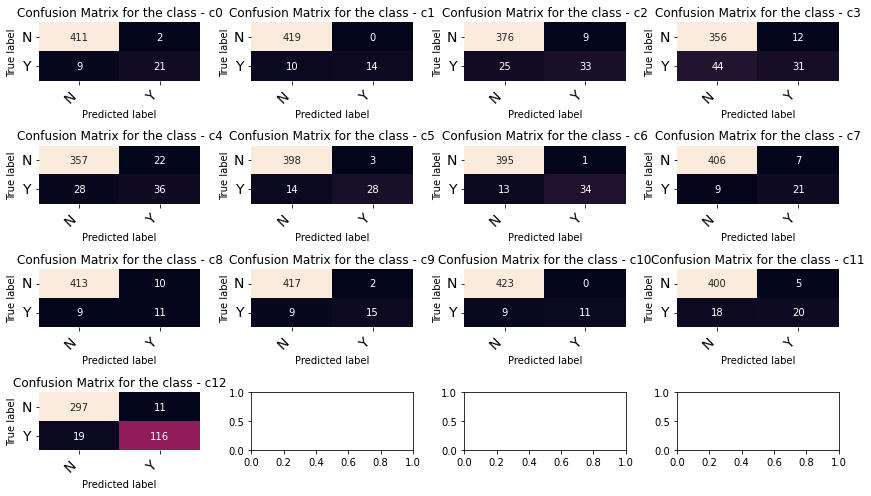

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [31]:
learn1 = Learner(dlsTrain3,timm.create_model('resnetrs50',num_classes=13,pretrained=True),
                metrics=[accuracy,CohenKappa(weights='quadratic')]).to_fp16()

In [37]:
# learn1.load("resnetrsRandAugLS")
learn1 = load_learner("resnetrsRandAugLS_77frames_regression.pkl")
# Si lo cargamos así es porque lo hemos guardado con el export y necesitamos hacer también todo lo anterior menos
# la celda del entrenamiento pero después de haberlo cargado aquí

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [17]:
multilabel_confusion_matrix# learn1.export("resnetrsRandAugLS_77frames_multilabel.pkl")

NameError: name 'learn1' is not defined

In [48]:
multilabel_confusion_matrix(y_true, y_pred)

IndexError: list index out of range

In [41]:
preds,gt = learn1.tta()

In [47]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score
accuracy_score(np.argmax(preds,axis=1),gt)

ImportError: cannot import name 'top_k_accuracy_score'